#PEC5: Ingeniería de Características

En esta PEC vamos a trabajar de forma práctica los diferentes procesos de los que se encarga la ingeniería de características.

Para abordar las tareas relativas a la ingeniería de características con Python vamos a utilizar e introducir la  **librería sklearn** (https://scikit-learn.org/stable/index.html), ampliamente utilizada en procesos de aprendizaje automático e ingeniería de características. Utilizaremos diferentes módulos dependiendo cuál sea nuestro objetivo:



*   sklearn.preprocessing (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).
*   sklearn.feature_selection (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection).

* sklearn.decomposition (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition).


*   Entre otras.



Además, en esta librería podemos encontrar el módulo sklearn.datasets (https://scikit-learn.org/stable/datasets/index.html) que incluye conjuntos de datos que nos posibilitan experimentar y realizar pequeños análisis con una finálidad didáctica.

Cabe mencionar que, además de esta librería, continuaremos utilizando las librerías introducidas en las PAC anteriores: pandas, numpy, scipy y matplotlib para las visualizaciones.


**La parte práctica de esta PEC consta en un ejercicio único o μ - Proyecto que girará entorno un dataset escogido por el estudiante entre las 4 opciones de datasets que es plantean:**

**Como en las prácticas anteriores, se realiza una breve introducción de las funciones e implementaciones relevantes que os puedan orientar en la realización del ejercicio práctico planteado.**

##1. DETECCIÓN DE OUTLIERS Y VALORES NO OBSERVADOS

Como hemos visto en la teoría, **los outliers** en nuestro dataset serán los valores que _están más alejados del rango en donde se concentran la mayoría de las muestras_. Es decir, serán las muestras u observaciones que están distantes de otras observaciones.

Para observar los Outliers, de forma cualitativa, en primer lugar podemos obtener el gráfico box-plot de las variables del dataset.

Seguidamente, se pueden aplicar diferentes reglas y/o algoritmos que nos ayuden a detectarlos e identificarlos. Asimismo, el análisis o detección de outliers se puede realizar considerando las variables del dataset de forma independiente o conjuntamente. Concretamente, en esta PAC veremos y trabajaremos:

- _La regla considerando la media y la desviación estándar._ En cada variable se asocian como outliers los valores que sean menores que la media menos 2.5 desviaciones estandars (m-2.5·std) y los valores que sean superiores a la media más 2.5 desviaciones estandars (m+2.5·std). Este factor 2.5, puede ser modificado por el experto que realice el análisis si lo considera apropiado en función de la forma y tamaño de los datos. No obstante, por defecto se considera 2.5.


-  _La regla considerando los cuartiles y el rango intercuartílico._ En cada variable se asocian como outliers los valores que están más de 1.5 veces el rango intercuartílico por encima del tercer cuartil (Q3), o por debajo del primer cuartil (Q1). Como sucede con la regla anterior, el factor por defecto de 1.5 puede cambiar (suele variar entre 1.5 y 3).

- Considerando conjuntamente las variables del dataset, podemos utilizar el _algoritmo de la Envolvente Elíptica_ (elliptic envelope en inglés), disponible también en la librería sklearn ( https://scikit-learn.org/stable/modules/generated/sklearn.covariance.EllipticEnvelope.html). Este algoritmo tiene en cuenta la covarianza y es recomendable cuando los datos siguen una distribución normal.



A continuación se presenta cómo se puede utilizar el método de la Envolvente y los resultados que se obtienen aplicándolo al dataset dataset_outliers.csv.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Cargar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
PATH="/content/drive/My Drive/"

In [ ]:
#PATH="######"


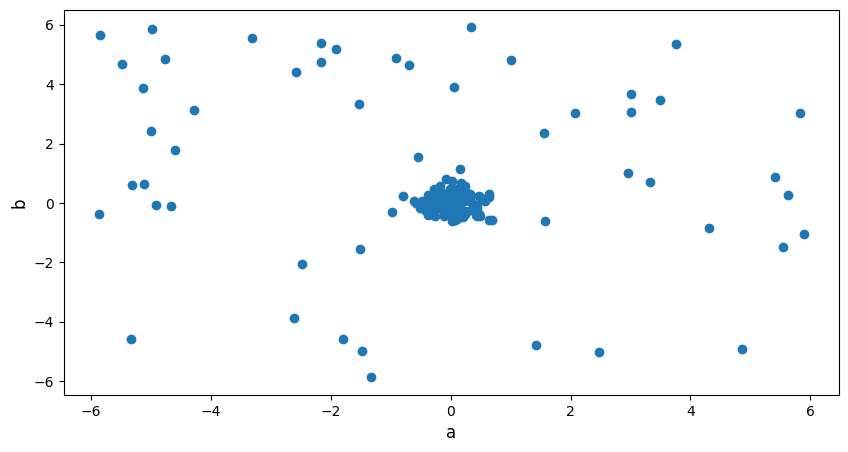

In [ ]:
## Cargar dataset
df_outliers= pd.read_csv(PATH+'outliers.csv')

# Representar dataset
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df_outliers.a.values,df_outliers.b.values)
plt.xlabel('a',fontsize=12)
plt.ylabel('b',fontsize=12)
plt.show()

In [ ]:
#Cargar librerías para utilizar el método de la Envelope
from scipy import stats
from sklearn.covariance import EllipticEnvelope

In [ ]:
# Aplicar el método Envolvente Elípticaa los datos para detectar los Outliers
outlier_method = EllipticEnvelope().fit(df_outliers)
scores_pred = outlier_method.decision_function(df_outliers)
threshold = stats.scoreatpercentile(scores_pred, 25) # definición del umbral. Tomamos el percentil 25 como el percentil en el que se encuentran los outliers
x = outlier_method.predict(df_outliers) #Los outlieres están donde se predice el valor -1.
idx_outliers= np.where(x==-1)[0]

In [ ]:
# Función para aplicar el método Envolvente Elíptica a los datos para detectar los Outliers
def detecion_outliers_m0(df):
  outlier_method = EllipticEnvelope().fit(df)
  scores_pred = outlier_method.decision_function(df)
  x = outlier_method.predict(df) #Los outlieres están donde se predice el valor -1.
  idx_outliers= np.where(x==-1)[0]

  return idx_outliers, df.iloc[idx_outliers,:]

idx_outliers_m0, valores_outliers_m0=detecion_outliers_m0(df_outliers)

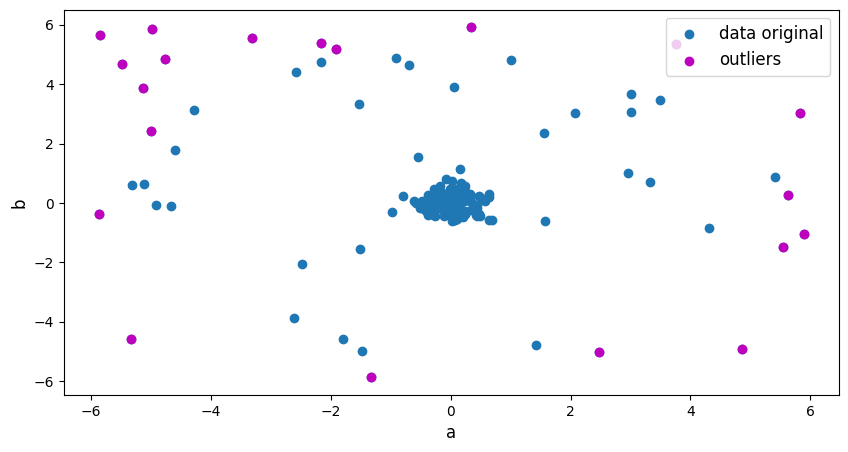

In [ ]:
# Representación de los resultados
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df_outliers.a.values,df_outliers.b.values, label='data original')
ax.scatter(df_outliers.a.values[idx_outliers_m0],df_outliers.b.values[idx_outliers_m0],c='m', label='outliers')
plt.legend(fontsize=12)
plt.xlabel('a',fontsize=12)
plt.ylabel('b',fontsize=12)
plt.show()

Adicionalmente, se pueden usar los valores de _scores_pred_ para establecer un umbral a partir del cual los valores son considerados outliers. Se suele establecer el umbral en función de un percentil determinado de la distribución de los datos (p.ejemplo percentil 25, 20, 10). Este valor de umbral puede variar en función de la naturaleza de los datos.

A continuación se muestra como quedaría modificada la función:



In [ ]:
# Función para aplicar un umbral dependiente del percentil de la distribución N-dimensional de los datos
def detecion_outliers_m0_umbral(df, percentil):
  outlier_method = EllipticEnvelope().fit(df)
  scores_pred = outlier_method.decision_function(df)
  threshold = stats.scoreatpercentile(scores_pred, percentil) # definición del umbral. Tomamos el percentil 25 como el percentil en el que se encuentran los outliers
  x = outlier_method.predict(df) #Los outlieres están donde se predice el valor -1.
  idx_outliers= np.where(scores_pred<=threshold)[0]

  return idx_outliers, df.iloc[idx_outliers,:]

idx_outliers_m0_umbral, valores_outliers_m0_umbral=detecion_outliers_m0_umbral(df_outliers,25)

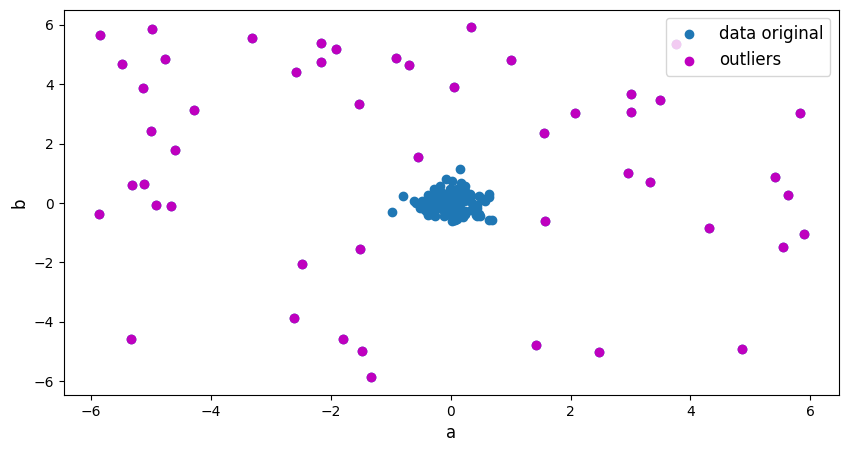

In [ ]:
# Representación de los resultados
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df_outliers.a.values,df_outliers.b.values, label='data original')
ax.scatter(df_outliers.a.values[idx_outliers_m0_umbral],df_outliers.b.values[idx_outliers_m0_umbral],c='m', label='outliers')
plt.legend(fontsize=12)
plt.xlabel('a',fontsize=12)
plt.ylabel('b',fontsize=12)
plt.show()

Por otro lado, respecto a la imputacion de los **datos faltantes**, en el reto anterior, ya vimos que una forma común de proceder es la imputación de los valores faltantes por la media, la mediana o la eliminación de los valores, según sea más apropiado.

En este reto, vamos a prestar atención en la _interpolación_ como método para imputar los valores faltantes.

Como se presenta en la teoría, tenemos diferentes tipos de interpolación (con el valor más cercano, lineal, cubica,...). La implementación de esta metodología se puede abordar con la utilización de la libreria scipy.

A continuación se presena un ejemplo de cómo se pueden implementar los diferentes tipos de interpolación.

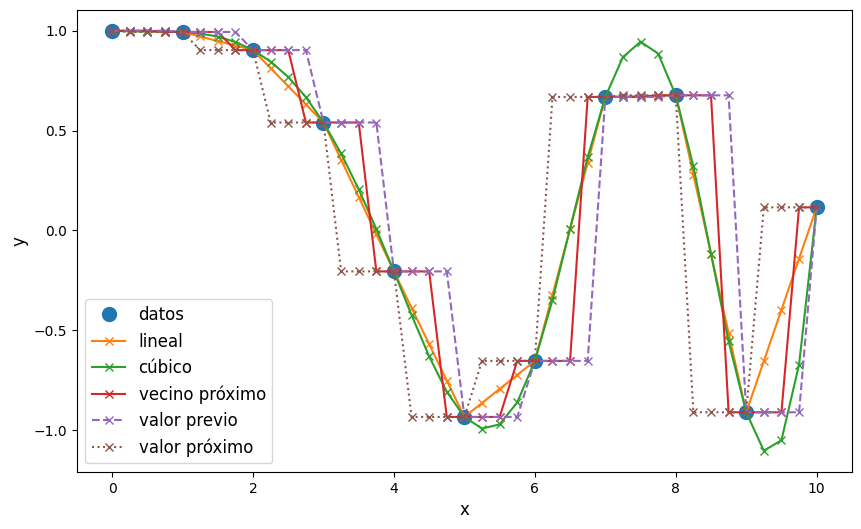

In [ ]:
## Código interpolación

from scipy.interpolate import interp1d

plt.figure(figsize=(10,6))
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)

xnew = np.linspace(0, 10, num=41, endpoint=True)


f = interp1d(x, y)
f1 = interp1d(x, y, kind='cubic')
f2 = interp1d(x, y, kind='nearest')
f3 = interp1d(x, y, kind='previous')
f4 = interp1d(x, y, kind='next')

plt.plot(x, y, 'o',ms='10')
plt.plot(xnew, f(xnew),'x-' ,xnew, f1(xnew),'x-')
plt.plot(xnew, f2(xnew), 'x-', xnew, f3(xnew), 'x--', xnew, f4(xnew), 'x:')
plt.legend(['datos', 'lineal', 'cúbico','vecino próximo', 'valor previo', 'valor próximo'], loc='best', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.xlabel('x', fontsize=12)
plt.show()






Cómo se puede observar a la imagen, con la interpolación hemos conseguido tener valores para cada valor de la nueva x con una resolución menor (cada 0.25).

##2. TRANSFORMACIONES Y ESCALADO DE VARIABLES

En esta parte vamos a trabajar las transformaciones de los datos. Como se ha introducido en la teoría, existen diferentes métodos para transformar los datos, entre los cuales, los más utilizados serían:
- Min-max
- Max absoluto
- Estandarización
- Normalización

La librería sklearn en su módulo _sklearn.preprocessing_, ofrece la implementación de estos métodos para su ulitización en el proceso de ingeniería de características (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).

A continuación, usando el dataset _planetas.csv_, se introduce como utilizar esta librería para realizar el escalado de los datos. Aunque este dataset no va a ser utilizado en los ejercicios prácticos, se adjunta con la PAC por si se quieren reproducir los resultados.



In [ ]:
df_planeta = pd.read_csv(PATH+'Planetas.csv',sep=',',encoding='latin-1').dropna(how='all')

In [ ]:
from sklearn.preprocessing import StandardScaler

X=df_planeta['Diametro'].values.reshape(-1, 1)

## Escalado Min- max
from sklearn.preprocessing import MinMaxScaler
X_transf_minmax = MinMaxScaler().fit_transform(X)


## Escalado Max absoluto
from sklearn.preprocessing import MaxAbsScaler
X_transf_maxAbs = MaxAbsScaler().fit_transform(X)


## Estandarización
from sklearn.preprocessing import StandardScaler
X_transf_estand = StandardScaler().fit_transform(X)

##Normalización
from sklearn.preprocessing import normalize
X_transf_norm = normalize(X, norm='l2',axis=0)

df_transform=pd.DataFrame()
df_transform['original']=df_planeta['Diametro'].values
df_transform['min_max']=X_transf_minmax
df_transform['max_abs']=X_transf_maxAbs
df_transform['Estandarizacion']=X_transf_estand
df_transform['Normalizacion']=X_transf_norm

df_transform

,original,min_max,max_abs,Estandarizacion,Normalizacion
0,4878,0.000000,0.034116,-0.896357,0.024263
1,12100,0.052293,0.084625,-0.753163,0.060186
2,12756,0.057043,0.089213,-0.740156,0.063449
3,6787,0.013823,0.047467,-0.858506,0.033759
4,142984,1.000000,1.000000,1.841933,0.711210
5,120536,0.837458,0.843003,1.396846,0.599553
6,51108,0.334743,0.357439,0.020266,0.254214
7,49538,0.323375,0.346458,-0.010863,0.246405


Hemos visto la transformación en variables numéricas. Ahora, vamoa a introducir las **transformaciones de variables categóricas en variables numéricas** mediante las técnicas One-Hot Encoder y ordinal Encoder, disponibles también en el módulo _sklearn.preprocessing_ de la librería sklearn.

A continuación se muestra a modo de ejemplo la codificación por ambos métodos de la variable _'Planeta'_ del dataset anterior.



In [ ]:
## Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder

X2=df_planeta['Planeta'].values.reshape(-1, 1)
enc = OrdinalEncoder()
enc.fit(X2)
X2_endod1=enc.transform(X2)

pd.concat([df_planeta, pd.DataFrame(X2_endod1)], axis=1)

,Planeta,Diametro,0
0,Mercurio,4878,2.0
1,Venus,12100,7.0
2,Tierra,12756,5.0
3,Marte,6787,1.0
4,Júpiter,142984,0.0
5,Saturno,120536,4.0
6,Urano,51108,6.0
7,Neptuno,49538,3.0


In [ ]:
## One-hot Encoder
from sklearn.preprocessing import OneHotEncoder
enc2 = OneHotEncoder(drop='first') ##
enc2.fit(X2)
X2_endod1= enc2.transform(X2).toarray()

pd.concat([df_planeta, pd.DataFrame(X2_endod1)], axis=1)

,Planeta,Diametro,0,1,2,3,4,5,6
0,Mercurio,4878,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Venus,12100,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Tierra,12756,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Marte,6787,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Júpiter,142984,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Saturno,120536,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,Urano,51108,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,Neptuno,49538,0.0,0.0,1.0,0.0,0.0,0.0,0.0


##3. EXTRACCIÓN DE CARACTERÍSTICAS




En esta parte de la PEC vamos a trabajar las técnicas de extracción o selección de características. Como hemos visto en la teoría, tenemos los métodos de filtros y los métodos embebidos (conocidos como métodos wrapper).



Antes de empezar con estas técnicas, es recomendable estudiar si existe correlación lineal entre las variables del dataset. De esta forma podemos discernir si hay variables redundantes e irrelevantes.

Una práctica común es obtener la matriz de correlaciones. Para ello, vamos a ejecutar el siguiente código. Para ejemplificar este proceso, se ha utilizado uno de los datasets disponibles a la librería sklearn, concretamente  load_breast_cancer (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer).


In [ ]:
# Cargar dataset
from sklearn.datasets import load_breast_cancer
import pandas as pd
data = load_breast_cancer()

# Asignar variables
X=data.data
y=data.target
feature_names=data.feature_names

df=pd.DataFrame(data= X, columns=feature_names)

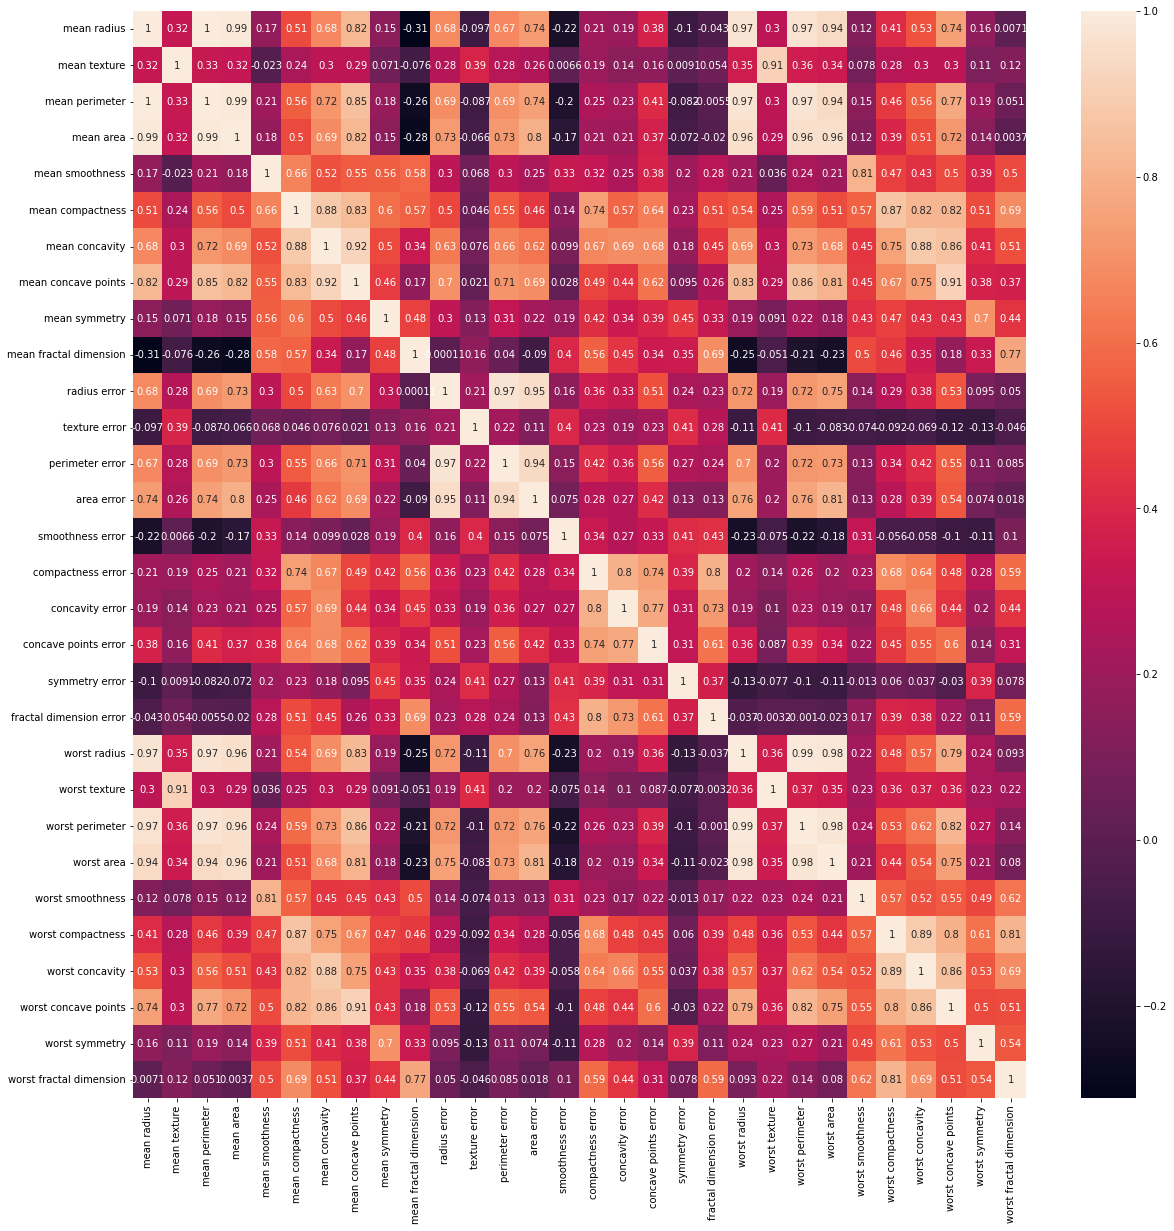

In [ ]:
## Matriz de correlación

import seaborn as sns
import matplotlib.pyplot as plt

correlation_mat = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_mat, annot = True)
plt.show()



Podemos observar que “mean_radius” , “mean perimeter”,  “mean área”, “worst radius”, “worst_perimeter” y “worst area” estan fuertamente correlacionadas. Por tanto, serian 5 de estas características redundantes i se pueden eliminar.

### 3.1. Filtros

En esta parte, para trabajar el filtro basado en el ranking de características vamos a utilizar el módulo _sklearn.feature_selection_ de la librería sklearn (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection). El ranking lo construiremos basandonos en diferentes coeficientes. Concretamente, si estamos frente a un problema de clasificación, utilizaremos:
> f_classif, chi2, mutual_info_classif

En cambio, si estamos frente a un problema de regresión, usaremos:


> f_regression, mutual_info_regression




Para ejemplificar este proceso, vamos a utlizar uno de los datasets disponibles en la librería sklearn, concretamente el _load_breast_cancer_ (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer) y obtener el ranking de sus características basándose en la métrica de la Información Mútua.

In [ ]:
# Cargar dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Asignar variables
X=data.data
y=data.target
feature_names=data.feature_names

The breast cancer dataset is a classic and very easy binary classification dataset.

In [ ]:
# Evaluación y selección de caracteristicas (obtener ranking de características)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif


bestfeatures = SelectKBest(score_func=mutual_info_classif, k='all').fit(X,y)
dfscores = pd.DataFrame(bestfeatures.scores_)

featureScores = pd.concat([pd.DataFrame(feature_names),dfscores],axis=1)
featureScores.columns = ['Caracteristica','Chi2']
featureScores=featureScores.nlargest(len(featureScores),'Chi2')

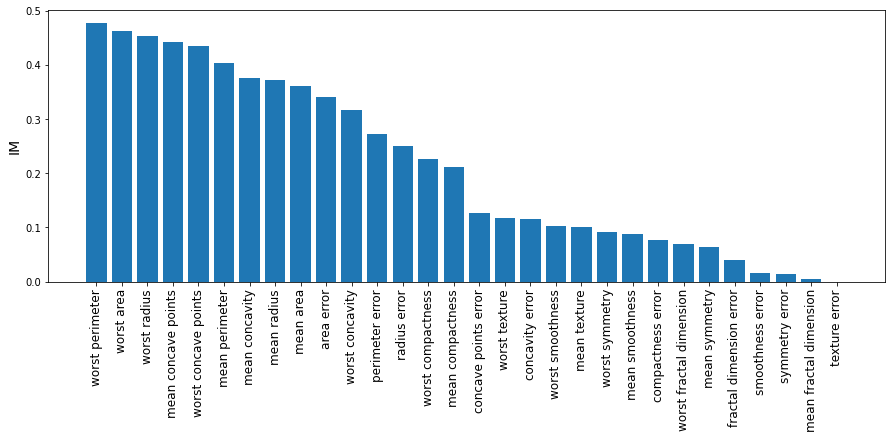

In [ ]:
# Representación del ranking de características basado en IM
plt.figure(figsize=(15,5))
xs=np.linspace(start=0, stop=len(featureScores)-1,num=len(featureScores))
plt.bar(xs, featureScores['Chi2'].values)
plt.xticks(xs, featureScores['Caracteristica'], rotation=90, fontsize=12)
plt.ylabel('IM', fontsize=14)
plt.show()

Observando los valores obtenidos, se advierte un cambio de dinámica cerca de la IM=0.2. Este hecho sugeriría poner un umbral en este valor y conservar las características que tengan un valor de IM mayor que 0.2.

Como se comenta en la teoría, es conveniente ser conservadores cuando realizamos selección de características con filtros ya que no considera el tipo de modelo que se obtendrá con los datos y su finalidad. Para ello, se recomienda obtener diversos rankings basándose en otras métricas y excluir las carácterísticas que cumplan los criterios en el conjunto de métricas obtenidas.

En el código expuesto anteriormente, para realizar el cambio de métrica es suficiente con modificar la _score_func_ utilizada para obtener los resultados del _SelectKBest()_.



### 3.2. Métodos de envoltura (Wrappers)

En los métodos de envoltura (wrapper methods en inglés), la selección de características se hace de forma iterativa hasta encontrar el subset de características óptimo. Es decir, se selecciona un conjunto de características i se entrena el modelo con ellas. En función de los resultados obtenidos, se decide si añadir o eliminar características al subset i se vuelve a evaluar el modelo.  Como hemos visto en la teoría, esta seleccion del conjunto de características iterativo se puede hacer hacia delante, hacia atrás y mediante la eliminación recursiva de características.







Las opciones de convergencia del método pueden considerar diferentes y multíples condiciones dependiendo del objetivo del estudio y de la experiencia del experto que realiza el proceso de ingeniería de características. **En este ejemplo vamos a considerar la condición de que la evaluación iterativa para cuando añadiendo la siguiente característica no se consigue mejorar el valor de la función de coste (el error de estimación).** No obstante, se podrían añadir condiciones adicionales como que la mejora fuera como mínimo de un determinado porcentaje o que esta mejora se mantuviese dos iteraciones seguidas, entre otras.

En la librería sklearn encontramos la función RFE (https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html) que nos puede ayudar en esta tarea puesto que nos devuelve la selección de carácterístiques óptimas para el modelo escogido según el número de características que se quiera considerar. Por lo tanto, los parámetres principales de entrada son el modelo y el número de características a considerar.

A continuación se muestra un código de ejemplo que devuelve el error de estimación del modelo de regresión definido, considerando diferentes números de características.

NOTA: La variable objetivo o clase en este dataset se la variable relativa al Ladder score ('ladder_score').

Cómo se trata de un problema de clasificación, el error lo mediremos con la accuracy.

In [ ]:
# Cargar dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Asignar variables
X=data.data
y=data.target
feature_names=data.feature_names
df=pd.DataFrame(data= X, columns=feature_names)
# eliminar colinealidades entre “mean_radius” , “mean perimeter”, “mean área”, “worst radius”, “worst_perimeter” i “worst area” (a partir de la matriz de correlación)
df.drop(columns=['mean perimeter', 'mean area','worst radius', 'worst perimeter', 'worst area'], inplace=True)
# eliminar colinealidades entre “radius error”, “perimeter error” , “área error” (a partir de la matriz de correlación)
df.drop(columns=['perimeter error', 'area error'], inplace=True)
X=df.values

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


# Función - obtener los modelos
def get_models():
	models = dict()
	for i in range(2, len(X.T)+1):
		rfe = RFE(estimator=RandomForestClassifier(random_state=44), n_features_to_select=i)
		model = RandomForestClassifier(random_state=44)
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models

# Función - evaluar los modelos
def evaluate_model(model, X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.3, random_state=44)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  scores = model.score(X_test, y_test)
  return scores


# definir las variables entrada-salida
#X=X
#y=y.reshape(-1, 1)

# Obtener modelos a evaluar
models = get_models()
# evaluar los modelos y almacenar métricas
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>N_caracteristicas %s --> mape: %.3f' % (name, scores))


>N_caracteristicas 2 --> mape: 0.930
>N_caracteristicas 3 --> mape: 0.942
>N_caracteristicas 4 --> mape: 0.942
>N_caracteristicas 5 --> mape: 0.953
>N_caracteristicas 6 --> mape: 0.947
>N_caracteristicas 7 --> mape: 0.959
>N_caracteristicas 8 --> mape: 0.965
>N_caracteristicas 9 --> mape: 0.959
>N_caracteristicas 10 --> mape: 0.959
>N_caracteristicas 11 --> mape: 0.965
>N_caracteristicas 12 --> mape: 0.965
>N_caracteristicas 13 --> mape: 0.965
>N_caracteristicas 14 --> mape: 0.965
>N_caracteristicas 15 --> mape: 0.965
>N_caracteristicas 16 --> mape: 0.965
>N_caracteristicas 17 --> mape: 0.965
>N_caracteristicas 18 --> mape: 0.965
>N_caracteristicas 19 --> mape: 0.965
>N_caracteristicas 20 --> mape: 0.965
>N_caracteristicas 21 --> mape: 0.959
>N_caracteristicas 22 --> mape: 0.959
>N_caracteristicas 23 --> mape: 0.965


Com es pot observar, en cada iteració es considera un nombre de carácterístiques, sent la o les característiques escollides en cada iteráció la combinació que millor resultats ofereix.
D'acord amb els resultats, la interació que presenta 8 característiques es la que millor accuracy té. Les 8 característique utilitzades son:

Cómo se puede observar, en cada iteración se considera un número de carácterístiques, siendo las características escogidas en cada iteráció la combinación que mejor resultados ofrece. De acuerdo con los resultados, la interació que presenta 8 características se la que mejor accuracy tiene. Las 8 característique utilizadas son:

In [ ]:
df.columns[models['6'][0].support_==True]


Index(['mean radius', 'mean concavity', 'mean concave points', 'radius error',
       'worst concavity', 'worst concave points'],
      dtype='object')

---

##4. REDUCCIÓN DE LA DIMENSIONALIDAD

Cuando tenemos un dataset con un número significativo de carácterísticas, es recomendable analizar la posibilidad de reducir su dimensionalidad. Una de las técnicas más utilizadas es el Analisis de Componentes Principales (PCA). Este método, mediante una transformación ortogonal de las características (componentes), evalua si con un determinado numero de componentes se puede explicar gran parte de la varianza de los datos. Normalmene, se suelen asignar como componentes principales aquellos que son capaces de explicar la varianza de almenos el 70-80% de los datos. Por tanto, utilzando estos componentes principales, seremos capaces de obtener modelos y aplicar los algoritmos de interés para el análisis, utilizando un dataset con una dimensionalidad menor.

Para realizar el Analisis de Componentes Principales (PCA) vamos a utilizar la el módulo _sklearn.decomposition_ de la librería sklearn.

A continuación, se muestra el código que nos permitirá obtener los componentes ortogonales y determinar los componentes principales del dataset utilizado anteriormente _breast_cancer_.



In [202]:
# Cargar dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Asignar variables
X=data.data
y=data.target
feature_names=data.feature_names
df=pd.DataFrame(data= X, columns=feature_names)
# eliminar colinealidades entre “mean_radius” , “mean perimeter”, “mean área”, “worst radius”, “worst_perimeter” i “worst area” (a partir de la matriz de correlación)
df.drop(columns=['mean perimeter', 'mean area','worst radius', 'worst perimeter', 'worst area'], inplace=True)
# eliminar colinealidades entre “radius error”, “perimeter error” , “área error” (a partir de la matriz de correlación)
df.drop(columns=['perimeter error', 'area error'], inplace=True)
X=df.values

In [203]:
# Estandarizacion datos
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA # Principal Component Analysis module
pca = PCA(n_components=len(X_std.T))
x_componentes = pca.fit_transform(X_std)
var_exp=pca.explained_variance_ratio_
cum_var_exp=np.cumsum(var_exp)

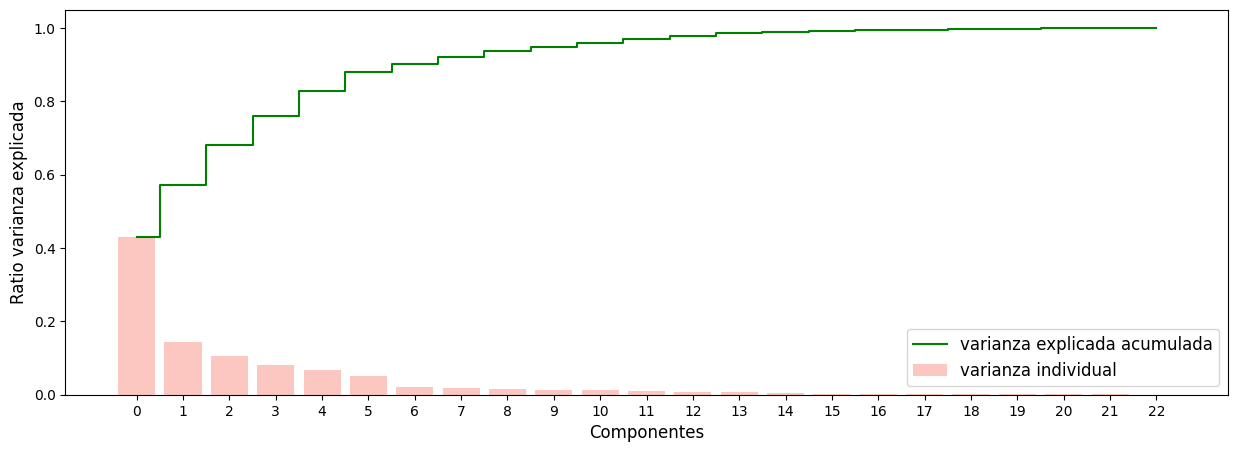

In [204]:
#Representar varianza y varianza acumulada junto con los componentes
plt.figure(figsize=(15, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.44, align='center', label='varianza individual', color = 'salmon')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='varianza explicada acumulada',color='g')
plt.xticks(ticks=range(len(cum_var_exp)))
plt.ylabel('Ratio varianza explicada', fontsize=12)
plt.xlabel('Componentes', fontsize=12)
plt.legend(loc='lower right',fontsize=12)




Observando el gráfico podemos advertir que con 4 componentes podemos explicar como mínimo el 70% de la varianza de los datos. Por tanto, los datos con los 4 componentes principales quedarán así:

In [ ]:
cum_var_exp

array([0.43086476, 0.57328926, 0.68014805, 0.76023719, 0.82727438,
       0.87959814, 0.90173629, 0.92073175, 0.93641767, 0.94884863,
       0.96044987, 0.97041631, 0.97883234, 0.98553353, 0.98914892,
       0.99171017, 0.99393503, 0.99543354, 0.99674376, 0.9979785 ,
       0.99900342, 0.99964387, 1.        ])

In [ ]:
pca_pc = PCA(n_components=4)
X_pc= pca_pc.fit_transform(X_std)

X_pc.shape

(569, 4)

## ENUNCIADO ÚNICO

En esta parte se plantea la realización de todo el proceso de ingeniería de características con un dataset escogido por el alumno de los cuatro que se proponen a continuación. De este modo, el alumno tendrá que cargar el conjunto de datos con el que desee realizar la actividad y llevar a cabo todos los pasos que se han ido mostrando previamente en esta PEC. En cada paso, las conclusiones que se pueden extraer o los resultados obtenidos tienen que ser comentados.

1.	Census-Income (KDD) Data Set https://archive.ics.uci.edu/ml/datasets/Census-Income+%28KDD%29


2.	Dermatology Data Set https://archive.ics.uci.edu/ml/datasets/Dermatology


3.	Horse Colic Data Set https://archive.ics.uci.edu/ml/datasets/Horse+Colic


4.	Hepatitis Data Set https://archive.ics.uci.edu/ml/datasets/Hepatitis



Los datasets están disponible a los links que se indican. En ellos, tendréis que clicar en Download Data Folder y descargarse el fichero .data y .names. El primero contiene los datos y es el que tendréis que utilizar pre realizar todo el análisis. El segundo da infomración relevante para poder entender el dataset y empezar a trabajar con él.

**Una vez escogida el dataset, los pasos y las cuestiones que tienen que ser cumplimentadas y respondidas son las que se especifican a continuación:**

Para realizar nuestra tarea, hemos escogido el dataset "Hepatitis"

In [205]:
from google.colab import drive
drive.mount('/content/drive')
PATH="/content/drive/My Drive/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [208]:
#Cargamos algunas librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [209]:
#Abrimos el dataset
data =  pd.read_csv(PATH+'hepatitis.data', sep=",", header=None)
print(data)

# Para leer el .names
with open(PATH+"hepatitis.names") as f:
    print(f.read())

     0   1   2  3   4  5  6  7  8  9  10 11 12 13    14   15   16   17  18  19
0     2  30   2  1   2  2  2  2  1  2  2  2  2  2  1.00   85   18  4.0   ?   1
1     2  50   1  1   2  1  2  2  1  2  2  2  2  2  0.90  135   42  3.5   ?   1
2     2  78   1  2   2  1  2  2  2  2  2  2  2  2  0.70   96   32  4.0   ?   1
3     2  31   1  ?   1  2  2  2  2  2  2  2  2  2  0.70   46   52  4.0  80   1
4     2  34   1  2   2  2  2  2  2  2  2  2  2  2  1.00    ?  200  4.0   ?   1
..   ..  ..  .. ..  .. .. .. .. .. .. .. .. .. ..   ...  ...  ...  ...  ..  ..
150   1  46   1  2   2  1  1  1  2  2  2  1  1  1  7.60    ?  242  3.3  50   2
151   2  44   1  2   2  1  2  2  2  1  2  2  2  2  0.90  126  142  4.3   ?   2
152   2  61   1  1   2  1  1  2  1  1  2  1  2  2  0.80   75   20  4.1   ?   2
153   2  53   2  1   2  1  2  2  2  2  1  1  2  1  1.50   81   19  4.1  48   2
154   1  43   1  2   2  1  2  2  2  2  1  1  1  2  1.20  100   19  3.1  42   2

[155 rows x 20 columns]
1. Title: Hepatitis Domain


In [ ]:
# Para leer el .data

#data =  pd.read_csv('fitxer.data', sep=",", header=None)
##print(data)

# Para leer el .names
##with open("fitxer.names") as f:
  ##  print(f.read())


### 1. Basándose en el dataset escogido, ¿cuál es el objetivo de este análisis o micro-proyecto?

1.1. Cargar los datos y guardarlos como un dataframe, asignando un nombre pertinente a las columnas.

1.2. Describir brevemente el dataset elegido

1.3. Determinar qué tipo de problema se puede abordar con él (problema de clasificación o de regresión).

1.4. Determinar de qué tipo es cada una de las variables del dataset. ¿A qué hace referencia cada una de ellas? ¿Cuáles son las características? ¿Cuál (o cuáles) es la clase o variable de respuesta?




In [210]:
#Asignamos los nombres de las columnas

data = pd.DataFrame(data)

data.columns =["class","age","sex",	"steroid"	,"antivirals",	"fatigue",	"malaise",	"anorexia",	"liver_big",	"liver_firm",	"spleen_palpable"	,
               "spiders",	"ascites",	"varices",	"bilirubin",	"alk_phosphate",	"sgot",	"albumin",	"protime",	"histology"]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   class            155 non-null    int64 
 1   age              155 non-null    int64 
 2   sex              155 non-null    int64 
 3   steroid          155 non-null    object
 4   antivirals       155 non-null    int64 
 5   fatigue          155 non-null    object
 6   malaise          155 non-null    object
 7   anorexia         155 non-null    object
 8   liver_big        155 non-null    object
 9   liver_firm       155 non-null    object
 10  spleen_palpable  155 non-null    object
 11  spiders          155 non-null    object
 12  ascites          155 non-null    object
 13  varices          155 non-null    object
 14  bilirubin        155 non-null    object
 15  alk_phosphate    155 non-null    object
 16  sgot             155 non-null    object
 17  albumin          155 non-null    ob

In [ ]:
#Describir brevemente el dataset elegido:


El dataset tiene 155 registros y 20 variables. La mayoría de las variables tienen los valores numéricos discretos(binarios).





In [211]:
data.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [135]:
#Determinar qué tipo de problema se puede abordar con él (problema de clasificación o de regresión).

Respuesta:

Ya que tenemos muchos valores discretos(binarios), podemos resolver problemas de clasificación. En este caso, podemos analizar la influencia de todas las variables en la variable "class".

In [136]:
#Determinar de qué tipo es cada una de las variables del dataset. ¿A qué hace referencia cada una de ellas?


Respuesta:

El primer atributo "class" tiene los valores numericos discretos (1,2) que corresponden a los valores categóricos ("die" y "live")

El atributo "age" tiene los valores numericos discretos que corresponden a la edad de las personas observadas.

El atributo "sex" tiene los valores numericos discretos (1,2) que corresponden a los valores categóricos ("male", "female")

Los siguientes atributos:"steroid","antivirals","fatigue","malaise","anorexia","liver_big","liver_firm","spleen_palpable"	,"spiders",	"ascites",	"varices" y "histology" tienen valores numéricos discretos (1,2) que corresponden a los valores categóricos ("No" y "Sí").

Los atributos "bilirubin" y "albumin" tienen los valores numéricos continuos.

Mientras que los atributos "alk_phosphate",	"sgot" y "protime" tienen los valores numéricos discretos.


In [137]:
data.dtypes

class               int64
age                 int64
sex                 int64
steroid            object
antivirals          int64
fatigue            object
malaise            object
anorexia           object
liver_big          object
liver_firm         object
spleen_palpable    object
spiders            object
ascites            object
varices            object
bilirubin          object
alk_phosphate      object
sgot               object
albumin            object
protime            object
histology           int64
dtype: object

Observamos que muchas de las variables tienen el tipo de datos "object", lo que podemos cambiar posteriormente mediante la función .astype()

In [138]:
#¿Cuáles son las características? ¿Cuál (o cuáles) es la clase o variable de respuesta?

Como variables de entrada, podemos seleccionar todos los atributos numéricos (discretos y numéricos continuos) excepto la variable "class"  y como la variable de respuesta podemos seleccionar la variable "class", que se refiere a los estados "die"/"live" de los pacientes.

### 2. Análisis descriptivo de las variables.

2.1. Obtener las principales métricas descriptivas (media, mediana, desviación estándar, percentil25, percentil75, mínimo, máximo) para las variables numéricas.

2.2. Obtener las tablas de frecuencia de las variables categóricas.

2.3. Obtener histogramas para los datos numéricos y diagramas  de frecuencia para los datos categóricos.

2.4. ¿Cómo son sus distribuciones? ¿Encuentras alguna particularidad en los datos?


In [212]:
#para comenzar, vamos a sustituir algunos valores del dataset.
data = data.astype(str)


In [213]:
#Sustituimos ? por np.nan en las columnas con valores numéricos discretos y continuos

variables_numericas = ['age','bilirubin',	'alk_phosphate',	'sgot',	'albumin',	'protime']

replacements = {'?': np.nan}


for i in data[variables_numericas]:
  data[i].replace(replacements, inplace = True)



In [214]:
#Ahora, cambiamos el tipo de datos en las columnas con valores numéricos
for i in data[variables_numericas]:
  data[i] = data[i].astype(float)

In [215]:
# Obtener las principales métricas descriptivas (media, mediana, desviación estándar, percentil25, percentil75, mínimo, máximo) para las variables numéricas.

data[variables_numericas].describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000
25%,32.000000,0.700000,74.250000,31.50000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,58.00000,4.000000,61.000000
75%,50.000000,1.500000,132.250000,100.50000,4.200000,76.250000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000


In [ ]:
#Obtener las tablas de frecuencia de las variables categóricas.

In [216]:
# sustituimos ? por np.nan


replacements = {
               '?': np.nan
}


variables_binarias = ["class",	"sex",	"steroid",	"antivirals",	"fatigue",	"malaise",
                      "anorexia",	"liver_big",	"liver_firm",	"spleen_palpable"
                      	,"spiders",	"ascites",	"varices", "histology"]


for i in data[variables_binarias]:
  data[i].replace(replacements, inplace = True)

In [217]:
#Ahora, cambiamos el tipo de datos en las columnas con valores binarios
for i in data[variables_binarias]:
  data[i] = data[i].astype("category")

In [218]:
data[variables_binarias].apply(pd.Series.value_counts)

,class,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology
1,32,139,76,24,100,61,32,25,60,30,51,20,18,85
2,123,16,78,131,54,93,122,120,84,120,99,130,132,70


_Comentarios:_

Observamos que:

Hay mucho más casos de pacientes vivos(2) de la variable 'clase'

En el dataset prevalen los datos de hombres('1' de la variable 'sex')

In [ ]:
#Obtener histogramas para los datos numéricos

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'bilirubin'}>],
       [<Axes: title={'center': 'alk_phosphate'}>,
        <Axes: title={'center': 'sgot'}>],
       [<Axes: title={'center': 'albumin'}>,
        <Axes: title={'center': 'protime'}>]], dtype=object)

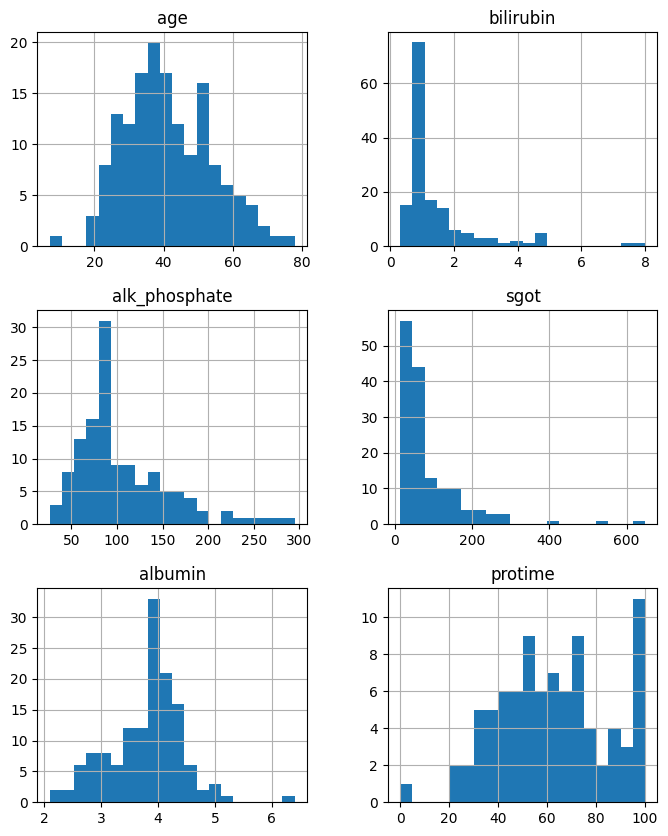

In [219]:
data[variables_numericas].hist(bins=20,figsize=(8,10))

In [ ]:
#Obtener diagramas de frecuencia para los datos categóricos.

<Axes: >

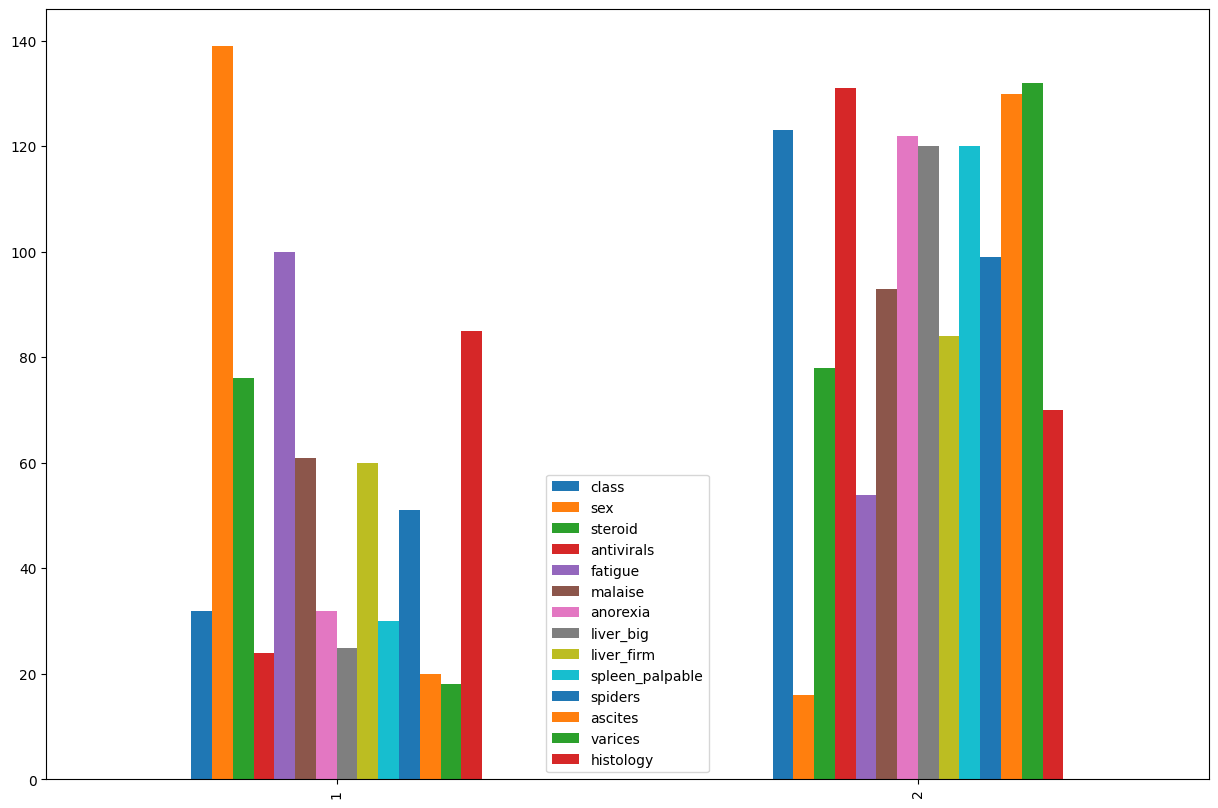

In [220]:
data[variables_binarias].apply(pd.Series.value_counts).plot.bar(figsize = (15,10))

In [221]:
#Observaciones visuales

En el caso de las variables numéricas(discretas y continuas), podemos observar que solo las variables "albumin" y "age" visualmente siguen la distribución normal. El resto de las variables son sesgados.

En el caso de las variables categóricas, podemos observar que hay más datos de los hombres ( '1' de la variable "sex"), hay mucho más casos de las observaciones con '2' en la variable "class" (vivos). La variable "steroid" tiene un número parecido de ambas valores (2 y 1).En el resto de las varibles, prevale la categoría '2'.

In [222]:
#Comprobación de la normalidad mediante los tests

In [223]:
from scipy import stats

for i in variables_numericas:
  statistic, p_value = stats.shapiro(data[i].dropna())
  if p_value > 0.05:
     print('Columna {}   --> Normal   '.format(i), statistic, p_value)
  else:
     print('Columna {}   --> Not normal   '.format(i), statistic, p_value)

Columna age   --> Normal    0.9845964908599854 0.0824248343706131
Columna bilirubin   --> Not normal    0.6579205989837646 3.8495672145405174e-17
Columna alk_phosphate   --> Not normal    0.8889100551605225 3.067009402002441e-08
Columna sgot   --> Not normal    0.6786147952079773 9.679619882492247e-17
Columna albumin   --> Not normal    0.9479126334190369 4.400717807584442e-05
Columna protime   --> Not normal    0.9694430828094482 0.03557172045111656


Observamos que solo la variable "age" sigue una distribución normal (p-value > 0.05). El resto de las variables tienen que ser normalizadas para su posterior análisis.

### 3. Análisis de datos faltantes y detección de outliers.

3.1. ¿Hay datos faltantes o no observados en las variables de tu dataset? ¿Qué metodología vas a utilizar para procesar estos datos (imputación, eliminación, interpolación,..)? ¿Cuál es la motivación para utilizar la metodología escogida?

3.2. Obtener el porcentaje de datos faltantes en cada variable.

3.2. Procesar los datos faltantes con la metodología escogida.

3.3. Realizar la detección de outliers o valores extremos.

3.4. ¿Que técnica has utilizado para detectar outliers?¿Por qué has escogido esta?


In [224]:
#Comprobamos la existencia de los datos faltantes en cada variable del dataset
for i in data.columns:
  print(i,data[i].isna().any())

class False
age False
sex False
steroid True
antivirals False
fatigue True
malaise True
anorexia True
liver_big True
liver_firm True
spleen_palpable True
spiders True
ascites True
varices True
bilirubin True
alk_phosphate True
sgot True
albumin True
protime True
histology False


In [225]:
#Contamos el porcetage de los valores faltantes en el dataset:
import warnings
warnings.filterwarnings("ignore")

print("El porcentage de los datos faltantes en el dataset:\n")
round(data.isnull().sum().sum() *100/ (data.notnull().sum().sum() +data.isnull().sum().sum()),2)


El porcentage de los datos faltantes en el dataset:



5.39

In [226]:

# El porcentage de Nan en cada variable del dataset
data.isna().sum()*100/ len(data)


class               0.000000
age                 0.000000
sex                 0.000000
steroid             0.645161
antivirals          0.000000
fatigue             0.645161
malaise             0.645161
anorexia            0.645161
liver_big           6.451613
liver_firm          7.096774
spleen_palpable     3.225806
spiders             3.225806
ascites             3.225806
varices             3.225806
bilirubin           3.870968
alk_phosphate      18.709677
sgot                2.580645
albumin            10.322581
protime            43.225806
histology           0.000000
dtype: float64

Observamos que el el porcentage total de los nans supera el 20%, por tanto no podemos eliminar todos los registros que contienen los valores perdidios.Tampoco, hay las característica con el porcentage de los nan superior al 70%, por tanto, no podemos eliminar por completo ninguna de las característica presentadas en el dataset. Así que, podemos descartar la técnica de eliminación de datos falantes.


En el caso de las variables numéricas, dependiendo de la distribución de los datos, podemos imputar los valores de media (distribución normal) o valores de mediana (distribución no normal). En el caso de las variables categóricas, podemos sustituir los valores faltantes con el valor de moda (.mode())

In [154]:
#A pesar de no tener los valores faltantes en la variable "age", podríamos sustituirlos del modo siguiente:

In [227]:
data["age"].fillna(data["age"].mean(),inplace=True)

In [228]:
#sustituimos los valores nan del resto de las variables numéricas  por el valor de su medianas
for i in ['albumin', 'protime','bilirubin', 'alk_phosphate', 'sgot']:
  data[i].fillna(data[i].median(),inplace=True)

In [229]:
#Ahora sustituimos Nan en las variables categoricas por el valor más frequente mediante la función .mode()

for i in variables_binarias:
  data[i].fillna(data[i].mode()[0],inplace=True)


In [230]:
# comprobamos que no hay más los datos faltantes:

data.isna().any().any()

False

In [160]:
#Realizar la detección de outliers o valores extremos.

La gráfica de caja nos permite observar si existen los valores extremos

<Axes: >

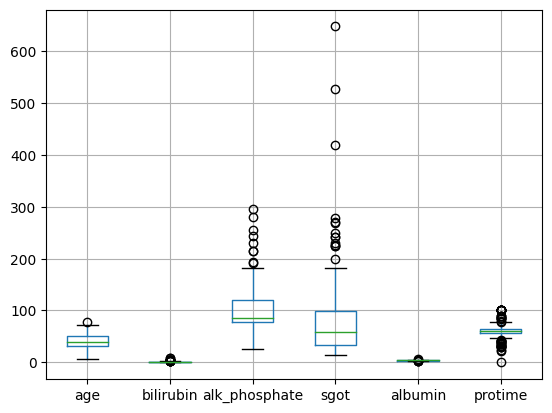

In [231]:
data.boxplot()

In [232]:
#Podemos encotrar los valores extremos mediante la siguiente función:



def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   #df_outliers = pd.DataFrame(outliers)

   return outliers#df_outliers

In [233]:
#Creamos la lista con los ínidices y valores extremos de cada variable numérica

lst_outliers = []
for i in variables_numericas:
  lst_outliers.append(find_outliers_IQR(data[i]))

lst_outliers

[2    78.0
 Name: age, dtype: float64,
 41     4.6
 62     3.5
 67     4.1
 71     2.8
 91     4.6
 97     3.0
 100    4.8
 103    4.6
 115    3.2
 119    3.2
 120    2.9
 127    2.8
 129    4.6
 131    8.0
 141    3.9
 146    4.2
 150    7.6
 Name: bilirubin, dtype: float64,
 30     280.0
 36     194.0
 47     191.0
 62     215.0
 90     230.0
 103    215.0
 110    256.0
 134    243.0
 140    295.0
 Name: alk_phosphate, dtype: float64,
 4      200.0
 11     249.0
 47     420.0
 72     271.0
 76     242.0
 81     224.0
 102    227.0
 103    269.0
 107    648.0
 108    225.0
 123    231.0
 132    278.0
 147    528.0
 150    242.0
 Name: sgot, dtype: float64,
 74     5.3
 104    2.1
 105    6.4
 127    2.4
 131    2.2
 144    2.4
 Name: albumin, dtype: float64,
 3       80.0
 10      85.0
 13      78.0
 18      85.0
 21      39.0
 22     100.0
 25     100.0
 27      36.0
 28     100.0
 30      40.0
 36      90.0
 38     100.0
 40      21.0
 43     100.0
 48      85.0
 53     100.0
 60   

In [234]:
# Para trabajar con el conjunto de datos completo, podemos sustituir los valores extremos con la media

def impute_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   upper = df[~(df>(q3+1.5*IQR))].max()

   lower = df[~(df<(q1-1.5*IQR))].min()

   df = np.where(df > upper,df.mean(),np.where(df < lower,df.mean(),df))



   return df

In [235]:
for i in  ["bilirubin" ,"alk_phosphate", "sgot" ,"albumin" ,"protime"]:
  data[i] = impute_outliers_IQR(data[i])


### 4. Transformación y escalado de variables

4.1. Relitzar la codificación de las variables categóricas (one hot-encoding, ordinal). ¿Qué técnica has escogido para codificar cada variable? ¿Por qué?

4.2. ¿Consideras que sería necesario llevar a cabo algún tipo de transfomació en alguna de las variables numéricas? ¿Cuál? Por qué? En caso de no verlo oportuno, para ver que se han asimilado los conceptos, realiza la transformación logarítmica de una variable que escojas.

4.3. Realiza la estandaritzación o escalado pertinente de los datos del dataset (hay que utilizar el dataset resultando del tratamiento de datos faltando y outliers, y de las transformacons previas de este punto) .

In [236]:
## Codigo
## Relitzar la codificación de las variables categóricas (one hot-encoding, ordinal)

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='first')
enc.fit(data[variables_binarias])
data_endod1= enc.transform(data[variables_binarias]).toarray()

pd.concat([data[variables_binarias], pd.DataFrame(data_endod1)], axis=1).head()

data[variables_binarias] = pd.DataFrame(data_endod1)

data.head(5)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,1.0,30.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,85.0,18.000000,4.0,61.000000,0.0
1,1.0,50.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.9,135.0,42.000000,3.5,61.000000,0.0
2,1.0,78.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,96.0,32.000000,4.0,61.000000,0.0
3,1.0,31.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,46.0,52.000000,4.0,61.483871,0.0
4,1.0,34.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,85.0,85.174194,4.0,61.000000,0.0


In [167]:
#¿Qué técnica has escogido para codificar cada variable? ¿Por qué?

Hemos realizado la codificación mediante el método one hot-encoding. Este método trabaja con los datos categóricos y los codifica en los valores binarios.

In [168]:
#¿Consideras que sería necesario llevar a cabo algún tipo de transfomació en alguna de las variables numéricas?
#¿Cuál? Por qué? En caso de no verlo oportuno, para ver que se han asimilado los conceptos,
# realiza la transformación logarítmica de una variable que escojas.

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'bilirubin'}>],
       [<Axes: title={'center': 'alk_phosphate'}>,
        <Axes: title={'center': 'sgot'}>],
       [<Axes: title={'center': 'albumin'}>,
        <Axes: title={'center': 'protime'}>]], dtype=object)

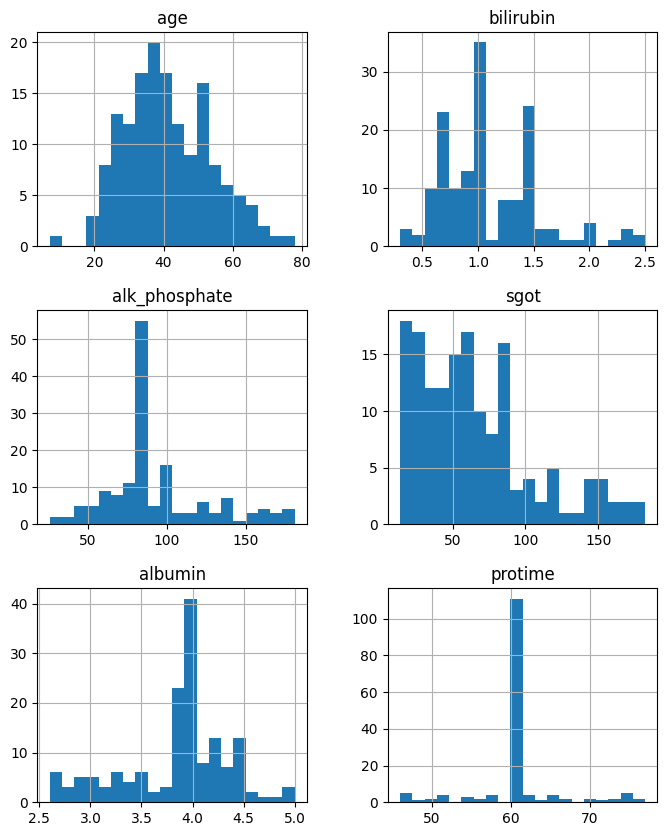

In [237]:
#Observamos otra vez las distribuciones de las variables numéricas

data[variables_numericas].hist(bins=20,figsize=(8,10))

Text(0.5, 1.0, 'Log-Transformed "bilirubin" Data')

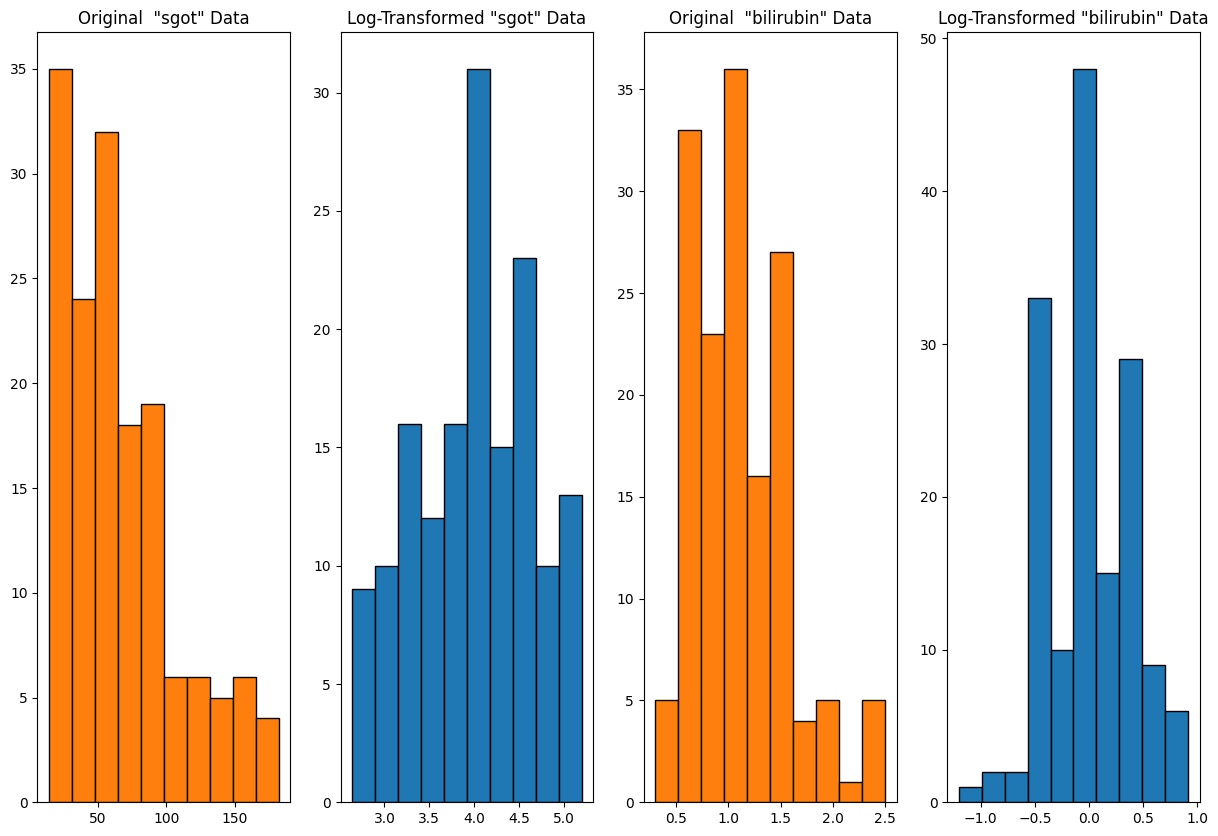

In [238]:
#Al observar las distribuciones, podemos decir que la variable "sgot" es bastante sesgada,
#por tanto podemos realizar la transformación algorítmica de esta variable:

sgot_log = np.log(data.sgot)
bilrubin_log =np.log(data.bilirubin)

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=4,figsize=(15,10))

#create histograms
axs[0].hist(data.sgot, edgecolor='black',color='C1')
axs[1].hist(sgot_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original  "sgot" Data')
axs[1].set_title('Log-Transformed "sgot" Data')

#create histograms
axs[2].hist(data.bilirubin, edgecolor='black',color='C1')
axs[3].hist(bilrubin_log, edgecolor='black')

#add title to each histogram
axs[2].set_title('Original  "bilirubin" Data')
axs[3].set_title('Log-Transformed "bilirubin" Data')

Observamos que la transformación logarítmica disminuye el sesgo en las variables "sgot" y "bilirubin".

In [239]:
data.sgot = sgot_log
data.bilirubin = bilrubin_log

In [240]:
#Ahora realizamos escalado Min/Max los datos numéricos

from sklearn.preprocessing import StandardScaler

# Assuming same lines from your example
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#var_to_norm = ['bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']
data[variables_numericas] = scaler.fit_transform(data[variables_numericas])


### 5. Extracción de características

5.1. ¿Hay alguna o algunas características redundantes?

5.2. Plantear la selección de características basada en filtros. ¿Qué criterio o criterios consideras utilizar?

 NOTA: Como hemos visto en la PAC, dependiendo si estamos frente a un problema de clasificación o de regresión, los score_func que se pueden utilizar son diferentes.

5.3. Plantear la selección de característica basada en métodos wrapper. ¿Qué método has utilizado, hacia adelante o hacia atrás?

NOTA: la función del modelo y la función de coste variará dependiendo del tipo de problema. En el apartado 3.2, hemos trabajado con un modelo de clasificación. Las funciones análoges de obtención del modelo (get_modelos()) y de evaluación del modelo (evaluate_modelo) para resolver un problema de regresión se adjunta a la celda siguiente por si vuestro problema atiende a este tipo.

5.4. ¿Qué resultados ofrecen ambos métodos (filtros y wrappers)? Atendiendo a los resultados, ¿propones excluir alguna característica? ¿En qué criterio te basas para ello?


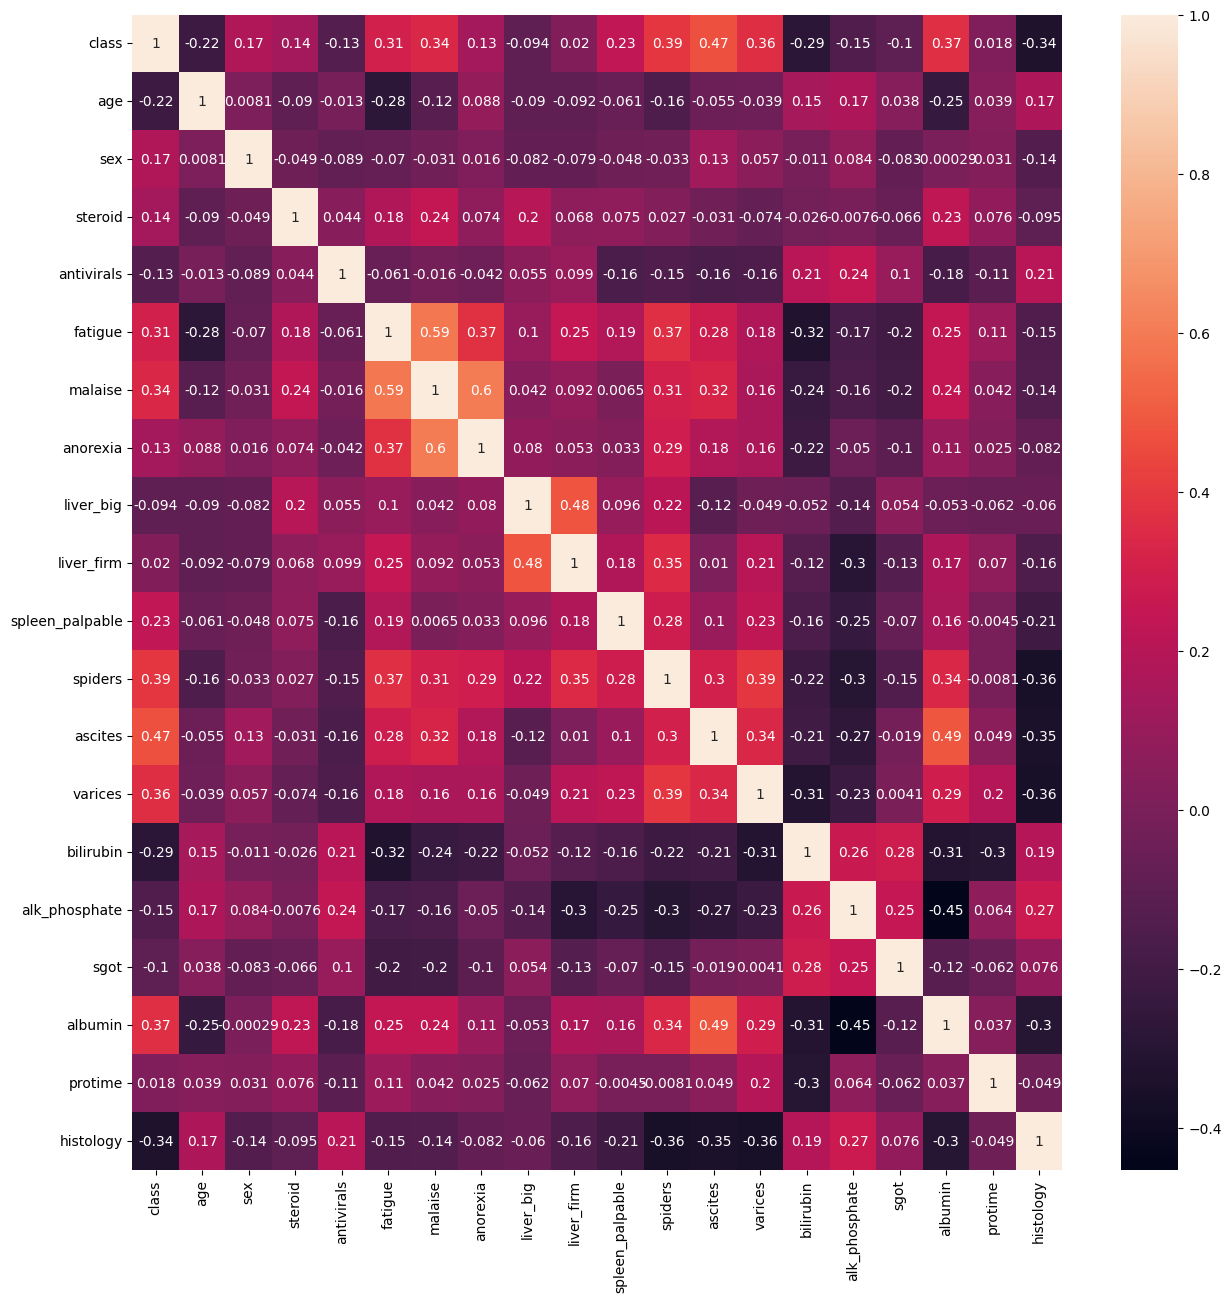

In [241]:
## Matriz de correlación

import seaborn as sns
import matplotlib.pyplot as plt

correlation_mat = data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_mat, annot = True)
#sns.barplot(correlation_mat)
plt.show()


Observamos que no hay los atributos con una el coeficiente de correlación muy alto (más de 0.75), por tanto no podemos eliminar las variables.

In [ ]:
#Ahora vamos a aplicar el método de filtrado


Ya que estamos ante un problema de clasificación, podemos aplicar el criterio de información mutua.

In [242]:
X = data.drop("class",axis=1)   #Feature Matrix
y = data["class"]          #Target Variable

feature_names = data.columns.drop('class')

In [243]:
# Evaluación y selección de caracteristicas (obtener ranking de características)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif


bestfeatures = SelectKBest(score_func=mutual_info_classif, k='all').fit(X,y)
dfscores = pd.DataFrame(bestfeatures.scores_)

featureScores = pd.concat([pd.DataFrame(feature_names),dfscores],axis=1)
featureScores.columns = ['Caracteristica','mutual_info_classif']
featureScores=featureScores.nlargest(len(featureScores),'mutual_info_classif')

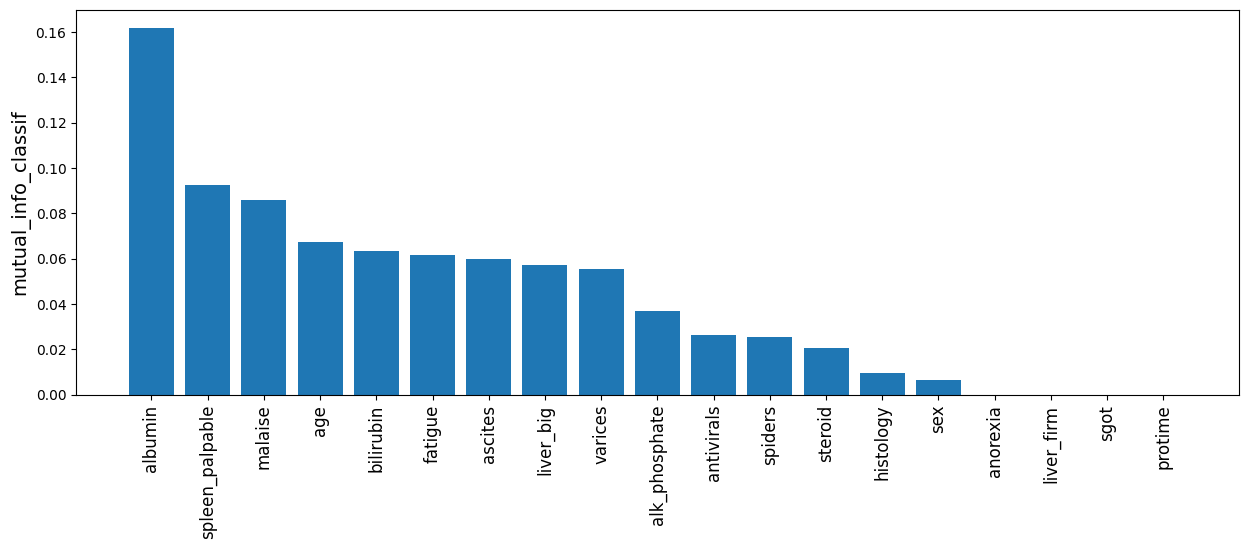

In [244]:
# Representación del ranking de características basado en chi2
plt.figure(figsize=(15,5))
xs=np.linspace(start=0, stop=len(featureScores)-1,num=len(featureScores))
plt.bar(xs, featureScores['mutual_info_classif'].values)
plt.xticks(xs, featureScores['Caracteristica'], rotation=90, fontsize=12)
plt.ylabel('mutual_info_classif', fontsize=14)
plt.show()

Observando los resulados del método informaación mutua, podemos deducir que las variables por debajo del valor 0.04 (antivirales,alk_phosphate,spleen_palpable,liver_firm,steroid,sex,liver_big,anorexia,sgot,protime) no tienen una influencia importante sobre la variable 'class'

In [176]:
#Plantear la selección de característica basada en métodos wrapper. ¿Qué método has utilizado, hacia adelante o hacia atrás?

Al estar ante un problema de clasificación, podemos utilizar el método RandomFores Classifier y la eliminación recursiva.

In [245]:

# Asignar variables
X = data.drop("class",axis=1)   #Feature Matrix
y = data["class"]          #Target Variable

feature_names = data.columns.drop('class')

df=pd.DataFrame(data= X, columns=feature_names)

X=df.values

In [246]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


# Función - obtener los modelos
def get_models():
	models = dict()
	for i in range(2, len(X.T)+1):
		rfe = RFE(estimator=RandomForestClassifier(random_state=44), n_features_to_select=i)
		model = RandomForestClassifier(random_state=44)
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models

# Función - evaluar los modelos
def evaluate_model(model, X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.3, random_state=44)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  scores = model.score(X_test, y_test)
  return scores


# definir las variables entrada-salida
#X=X
#y=y.reshape(-1, 1)

# Obtener modelos a evaluar
models = get_models()
# evaluar los modelos y almacenar métricas
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>N_caracteristicas %s --> mape: %.3f' % (name, scores))


>N_caracteristicas 2 --> mape: 0.723
>N_caracteristicas 3 --> mape: 0.723
>N_caracteristicas 4 --> mape: 0.766
>N_caracteristicas 5 --> mape: 0.787
>N_caracteristicas 6 --> mape: 0.809
>N_caracteristicas 7 --> mape: 0.830
>N_caracteristicas 8 --> mape: 0.787
>N_caracteristicas 9 --> mape: 0.851
>N_caracteristicas 10 --> mape: 0.872
>N_caracteristicas 11 --> mape: 0.851
>N_caracteristicas 12 --> mape: 0.830
>N_caracteristicas 13 --> mape: 0.830
>N_caracteristicas 14 --> mape: 0.830
>N_caracteristicas 15 --> mape: 0.830
>N_caracteristicas 16 --> mape: 0.872
>N_caracteristicas 17 --> mape: 0.851
>N_caracteristicas 18 --> mape: 0.851
>N_caracteristicas 19 --> mape: 0.830


Observamos las características más importantes según Random forest clasificación

In [247]:
df.columns[models['19'][0].support_==True]

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology'],
      dtype='object')

Al realizar diferentes métodos del filtrado, podemos considerar la eliminación de las siguientes variables:

In [248]:
elim_lst = [i for i in df.columns[models['19'][0].support_==True] if i in  ["antivirals","alk_phosphate","spleen_palpable","liver_firm","steroid","sex","liver_big","anorexia","sgot","protime"]]
elim_lst

['sex',
 'steroid',
 'antivirals',
 'anorexia',
 'liver_big',
 'liver_firm',
 'spleen_palpable',
 'alk_phosphate',
 'sgot',
 'protime']

In [249]:
# Eliminamos las columnas despues el método del filtrado
data1 = data.drop(elim_lst,axis=1).copy()
data1.head()

,class,age,fatigue,malaise,spiders,ascites,varices,bilirubin,albumin,histology
0,1.0,0.323944,1.0,1.0,1.0,1.0,1.0,0.567841,0.583333,0.0
1,1.0,0.605634,0.0,1.0,1.0,1.0,1.0,0.518149,0.375000,0.0
2,1.0,1.000000,0.0,1.0,1.0,1.0,1.0,0.399619,0.583333,0.0
3,1.0,0.338028,1.0,1.0,1.0,1.0,1.0,0.399619,0.583333,0.0
4,1.0,0.380282,1.0,1.0,1.0,1.0,1.0,0.567841,0.583333,0.0


In [182]:
### funcions anàlogues de l'apartat 3.2 per a resoldre problemes de classificació:


from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Función - obtener los modelos
def get_models():
	models = dict()
	for i in range(2, 10):
		rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=i)
		model = RandomForestRegressor(random_state=44)
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models

# Función - evaluar los modelos
def evaluate_model(model, X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.3, random_state=44)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  scores = mean_absolute_percentage_error(y_test, y_pred)
  return scores

### 6. Reducción dimensionalidad

6.1 Aplicar una técnica de reducción de la dimensionalidad. La PCA es el método comúnmente utilizado y que se recomienda para la realización de este ejercicio; no obstante, podéis explorar y utilizar otra técnica (SVD, LDA,..) si lo consideráis oportuno.

6.2. ¿Qué técnica has utilizado?

6.3. ¿Cuantas dimensiones o componentes tiene tu dataset después de aplicar la técnica de reducción de dimensionalidad? ¿Por qué has considerado solo este número de componentes?

6.4. Representar la relación entre los componentes principales y la variable de respuesta.
Sugerencia: Representar mediante un scatter plot componente1 vs componente2 codificando los puntos con un color correspondiente en la clase o variable de respuesta, otro componente1 vs componente3 codificando los puntos con un color correspondiente en la clase o variable de respuesta, ... ¿Qué interpretas de esta representación?

Respuesta:

Para reemplazar las características redundantes con nuevas características que sintetizan la información, podemos utilizar PCA (análisis de los componentes principales)

In [250]:

# Asignar variables
X = data1.drop("class",axis=1)   #Feature Matrix
y = data1["class"]          #Target Variable

feature_names = data1.columns.drop('class')

df=pd.DataFrame(data= X, columns=feature_names)

X=df.values

In [251]:
# Estandarizacion datos
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA # Principal Component Analysis module
pca = PCA(n_components=len(X_std.T))
x_componentes = pca.fit_transform(X_std)
var_exp=pca.explained_variance_ratio_
cum_var_exp=np.cumsum(var_exp)

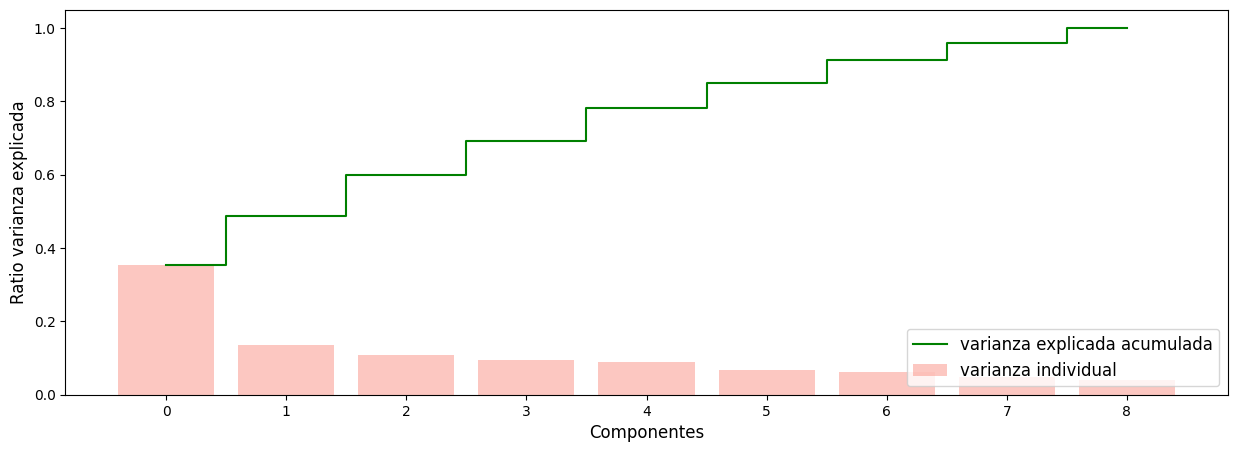

In [252]:
#Representar varianza y varianza acumulada junto con los componentes
plt.figure(figsize=(15, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.44, align='center', label='varianza individual', color = 'salmon')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='varianza explicada acumulada',color='g')
plt.xticks(ticks=range(len(cum_var_exp)))
#plt.xticks(range(len(cum_var_exp)),[i for i in data1.columns.drop('class')],rotation ='vertical')
plt.ylabel('Ratio varianza explicada', fontsize=12)
plt.xlabel('Componentes', fontsize=12)
plt.legend(loc='lower right',fontsize=12)


In [253]:
cum_var_exp

array([0.35265592, 0.48870146, 0.59792993, 0.69187369, 0.78212873,
       0.8507626 , 0.91177983, 0.95996363, 1.        ])

In [ ]:
#¿Cuantas dimensiones o componentes tiene tu dataset después de aplicar la técnica de reducción de dimensionalidad?
#¿Por qué has considerado solo este número de componentes?

Podemos observar que los primeros 7 componentes explican más de 90% de la variable "class", por tanto creamos un nuevo dataset con estos 7 dimensiones.

In [254]:
pca_pc = PCA(n_components=7)
X_pc= pca_pc.fit_transform(X_std)

X_pc.shape


(155, 7)

In [188]:
#Representamos la relación entre los componentes principales y la variable de respuesta.

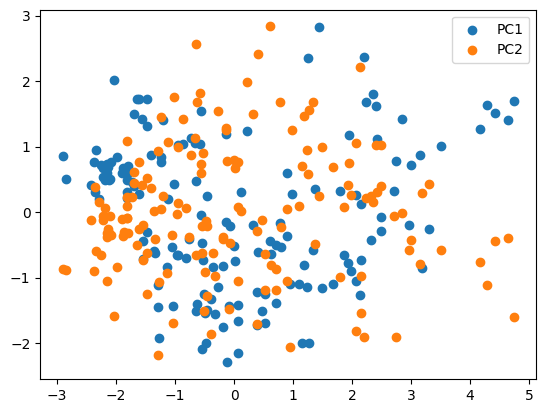

In [255]:
plt.scatter(X_pc[:,0], X_pc[:,1],label='PC1')
plt.scatter(X_pc[:,0], X_pc[:,2],label='PC2')
plt.legend()
#plt.xlabel('PC1')
#plt.ylabel('PC2')
plt.show()

Observando la relación entre PC1 y PC2, no encotramos una fuerte relación lineal.

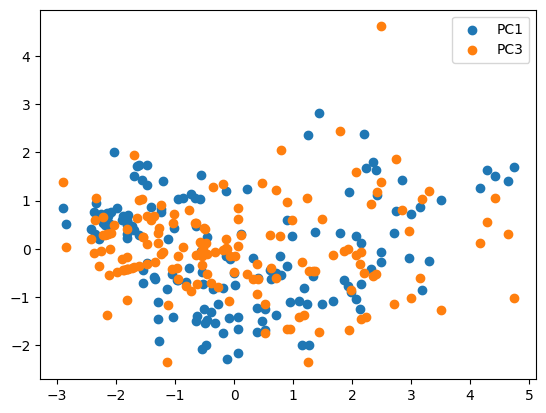

In [256]:
plt.scatter(X_pc[:,0], X_pc[:,1],label='PC1')
plt.scatter(X_pc[:,0], X_pc[:,3],label='PC3')
plt.legend()
#plt.xlabel('PC1')
#plt.ylabel('PC2')
plt.show()

Observando la relación entre PC1 y PC3, no encotramos una fuerte relación lineal.

### 7. Breves conclusiones o comentarios de los resultados obtenidos en este ejercicio

_Comentarios:_

Hemos analizado el dataset "Hepatitis", intentando resolver un problema de clasificasión y obtener las características que más influyen en el hecho de fallecer o no, con hepatitis.

Aplicando métodos de filtrado y envoltura, hemos reducido el número de las variables. El siguiente paso, hemos realizado el PCA y hemos establecido los componentes que más influyen en la varible "class" (fallecer/no).

Podemos concluir que las siguientes característican tienen más peso (descendentemente): age,	fatigue,	malaise,	spiders,	ascites,	varices,bilirubin.